# Exercício 3

## Item a)

Essa expressão pode ser vista como a representação binária de um número no intervalo $[0, 1]$. Assim, podemos encontrar a $CDF$ dessa VA com base na representação numérica binária.

Seja $x = (x_1, x_2, x_3, ...)$ um número na base $2$, com $x_i \in \{0, 1\} \ \forall \ i$. Agora, um outro número na base $2$ será maior que $x$ se seu primeiro algarismo for maior que o primeiro algarismo de $x$ ou se o primeiro for igual e o segundo for maior ou se os dois primeiros forem iguais e o terceiro for maior e assim por diante. Dessa forma,

$$
P(X > x) = P(\{X_1 > x_1\} \ \cup \ \{X_1 = x_1, X_2 > x_2\} \ \cup \ \{X_1 = x_1, X_2 = x_2, X_3 > x_3\},\ ...)
$$

Como esses eventos são todos disjuntos e como os $X_i$'s são independentes,

$$
P(X > x) = P(X_1 > x_1) + P(X_1 = x_1)P(X_2 > x_2) + P(X_1 = x_1)P(X_2 = x_2)P(X_3 > x_3) \ ...
$$

Agora, temos que $P(X_i = x_i) = 1/2$, já que $X_i \sim Bern(1/2)$. Além disso, podemos escrever $P(X_i > x_i) = \dfrac{1-x_i}{2}$, já que, se $x_i = 0$, isso se resume a $P(X_i = 1) = 1/2$, e, se $x_i = 1$, $P(X_i > x_i) = P(X_i > 1) = 0$. Dessa forma,

$$
P(X > x) = \dfrac{1-x_1}{2} + \dfrac{1}{2}\cdot\dfrac{1-x_2}{2} + \dfrac{1}{2}\cdot\dfrac{1}{2}\cdot\dfrac{1-x_3}{2} \ ... \\
$$
$$
P(X > x) = \dfrac{1}{2} - \dfrac{x_1}{2} + \dfrac{1}{2^2} - \dfrac{x_2}{2^2} + \dfrac{1}{2^3} - \dfrac{x_3}{2^3} \ ... \\
$$
$$
P(X > x) = \sum_{i = 1}^{\infty} \dfrac{1}{2^i} - \sum_{i = 1}^{\infty} \dfrac{x_i}{2^i}
$$

Pela soma da série geométrica, $\sum_{i = 1}^{\infty} \dfrac{1}{2^i} = 1$, e $\sum_{i = 1}^{\infty} \dfrac{x_i}{2^i} = x$. Desse modo,

$$
P(X > x) = 1 - x \Longrightarrow P(X \leq x) = x
$$

Essa é justamente a $CDF$ da uniforme padrão. Portanto, $X \sim Unif(0,1)$.

## Item b)

Primeiramente, vamos ver quantos termos são necessários para representar um número com a precisão máxima permitida pela máquina. Para isso, podemos ver até que parcela é necessária para obter uma representação exata de um número. Para facilitar, usaremos como experimento o $1$. Assim, ao atribuir a todas as VAs $X_i$ o valor $1$, faremos a representação binária do número $1$ e veremos a partir de que termo desse somatório o valor resultante é considerado realmente $1$ pelo computador.

In [1]:
import numpy as np

# Inicializando as variáveis
n = 0
i = 0

# Enquanto o valor resultante não for 1...
while n != 1:
    # Adiciona uma parcela
    i += 1
    # Calcula o somatório
    n = np.sum([1/(2**j) for j in range(1, i)])

print("Número necessário de parcelas: ", i)

Número necessário de parcelas:  55


Portanto, são necessárias $55$ parcelas para atingir a precisão máxima.

Com isso, podemos criar nosso gerador de números uniformemente distribuídos:

In [2]:
# Função para gerar n números uniformemente distribuídos entre 0 e 1
def gen_uniform_nums(n):
    # Array com os fatores 2^(-i)
    factors = np.array([2**(-i) for i in range(1, 56)])
    # Array com o suporte da Bernoulli
    bern = np.array([0, 1])
    # Array para armazenar os números gerados
    nums = np.zeros((n))

    # Para cada número...
    for i in range(n):
        # Gera um vetor com os resultados das Bernoullis
        X_i = np.random.choice(bern, 55, replace = True)
        # Calcula o número com o somatório
        num = np.sum(factors * X_i)
        # Salva no array
        nums[i] = num

    return nums

## Item c)

Por fim, vamos testar nossa função e ver se seus números são realmente distribuídos uniformemente.

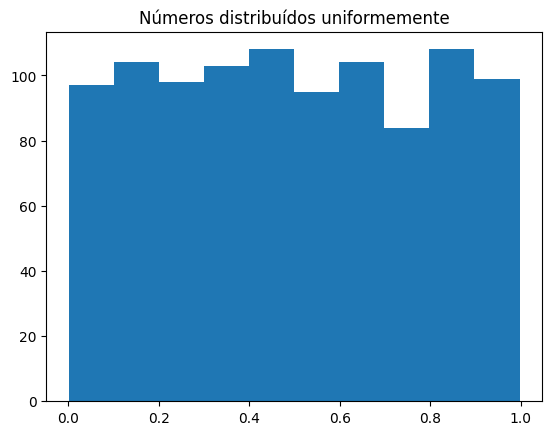

In [3]:
import matplotlib.pyplot as plt

# Gerando 1000 amostras
nums = gen_uniform_nums(1000)

# Plotando em um histograma
plt.hist(nums)
plt.title("Números distribuídos uniformemente")
plt.show()

Vemos que nossas amostras se aproximam de uma distribuição uniforme, com uma distribuição constante ao longo do suporte.

# Exercício 4

## Item a)

Primeiramente, precisamos encontrar a inversa da $CDF$ $F$  da $Expo(1)$.

$$
y = 1 - e^{-x} \\
$$
$$
e^{-x} = 1-y \\
$$
$$
ln(e^{-x}) = ln(1-y) \\
$$
$$
-x = ln(1-y) \\
$$
$$
x = -ln(1-y)
$$

Assim, temos que $F^{-1}(y) = -ln(1-y)$. Com isso, já podemos fazer nosso gerador de números distribuídos exponenciamente por meio da transformação quantil.

In [4]:
# Função para gerar números distribuídos exponencialmente
def gen_expo_nums(n):
    # Gerando números distribuídos uniformemente
    uniform_nums = gen_uniform_nums(n)
    # Transformando-os para a distribuição exponencial por meio da função quantil
    expo_nums = -np.log(1-uniform_nums)
    
    return expo_nums

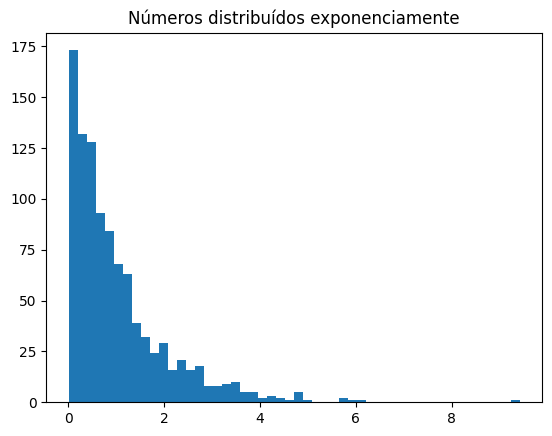

In [5]:
# Gerando 1000 amostras
expo_nums = gen_expo_nums(1000)

# Plotando um histograma
plt.hist(expo_nums, bins = 50)
plt.title("Números distribuídos exponenciamente")
plt.show()

Temos uma distribuição que tende para a exponencial. Perfeito!

## Item b)

Para usar a transformação de Box-Muller, primeiro precisamos de uma uniforme com suporte $(0, 2\pi)$. Para nossa sorte, como já temos uma uniforme padrão, basta aplicarmos uma transformação de escala multiplicando-a por $2\pi$. Assim, sendo $U$ essa nova uniforme e $T$ uma exponencial de parâmetro $1$ (a qual já temos), a transformação de Box-Muller diz que

$$
X = \sqrt{2T}\cdot cos(U) \sim \mathcal{N}(0, 1).
$$

Com isso, já podemos fazer nossa função.

In [6]:
# Função para gerar números distribuídos normalmente
def gen_normal_nums(n):
    # Gerando a Unif(0, 2pi)
    U = 2*np.pi*gen_uniform_nums(n)
    # Gerando a Expo(1)
    T = gen_expo_nums(n)

    # Calculando os valores da distribuição normal
    normal_nums = np.sqrt(2*T) * np.cos(U)

    return normal_nums

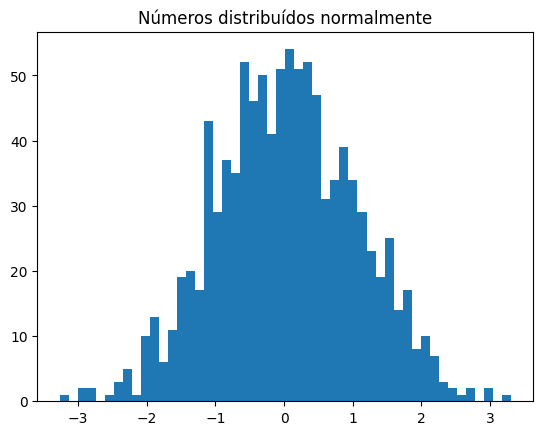

In [7]:
# Gerando 1000 amostras
normal_nums = gen_normal_nums(1000)

# Plotando em um histograma
plt.hist(normal_nums, bins = 50)
plt.title("Números distribuídos normalmente")
plt.show()

Temos oficialmente uma normal!